# Campaign Contributions RI - 2016 Presidential Election
##### SmirkyGraphs -  [Website](https://smirkygraphs.github.io/) - [Github](https://github.com/SmirkyGraphs/Python-Notebooks)
<hr>

In [1]:
# For data
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

from __future__ import division
import datetime

#### Importing Data

In [2]:
df = pd.read_csv("RI_Pres_Election_2016.csv", parse_dates=['contb_receipt_dt'])

In [3]:
df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,tran_id,election_tp,Party,County
0,C00458844,P60006723,"Rubio, Marco","BLOUNT, F. NELSON",BARRINGTON,RI,28061841.0,BLOUNT FINE FOODS,PRESIDENT,250.0,2016-02-02,NaN,NaN,NaN,SA17A,1056862,SA17.969678,P2016,Republican,BRISTOL
1,C00458844,P60006723,"Rubio, Marco","COOPER, DAVID",NEWPORT,RI,28402004.0,U.S. NAVAL WAR COLLEGE,PROFESSOR,100.0,2016-02-21,NaN,NaN,NaN,SA17A,1056862,SA17.1026442,P2016,Republican,NEWPORT
2,C00458844,P60006723,"Rubio, Marco","DEYOE, RONALD A. CAPT.",NEWPORT,RI,28401528.0,RETIRED,RETIRED,50.0,2016-02-18,NaN,NaN,NaN,SA17A,1056862,SA17.1018752,P2016,Republican,NEWPORT
3,C00458844,P60006723,"Rubio, Marco","FOGG, DAVID",NORTH KINGSTOWN,RI,28525103.0,AVC,SEMI-RETIRED,25.0,2016-02-14,NaN,NaN,NaN,SA17A,1056862,SA17.1010821,P2016,Republican,WASHINGTON
4,C00458844,P60006723,"Rubio, Marco","FOGG, DAVID",NORTH KINGSTOWN,RI,28525103.0,AVC,SEMI-RETIRED,25.0,2016-02-18,NaN,NaN,NaN,SA17A,1056862,SA17.1017099,P2016,Republican,WASHINGTON


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25888 entries, 0 to 25887
Data columns (total 20 columns):
cmte_id              25888 non-null object
cand_id              25888 non-null object
cand_nm              25888 non-null object
contbr_nm            25888 non-null object
contbr_city          25888 non-null object
contbr_st            25888 non-null object
contbr_zip           25884 non-null float64
contbr_employer      22604 non-null object
contbr_occupation    25827 non-null object
contb_receipt_amt    25888 non-null float64
contb_receipt_dt     25888 non-null datetime64[ns]
receipt_desc         6 non-null object
memo_cd              3785 non-null object
memo_text            12315 non-null object
form_tp              25888 non-null object
file_num             25888 non-null int64
tran_id              25888 non-null object
election_tp          25872 non-null object
Party                25888 non-null object
County               25888 non-null object
dtypes: datetime64[ns](1), 

#### 25,888 Donations from Rhode Island

In [5]:
sum_df = df.groupby(['contb_receipt_dt'],as_index=False).sum()

In [6]:
sum_df.head()

,contb_receipt_dt,contbr_zip,contb_receipt_amt,file_num
0,2014-09-25,29162037.0,250.0,1057794
1,2015-03-24,29102034.0,250.0,1004025
2,2015-03-27,28321109.0,500.0,1003942
3,2015-03-29,28403811.0,250.0,1004025
4,2015-04-02,28884929.0,50.0,1024046


<hr>
### Line graph of how much money was donated per day

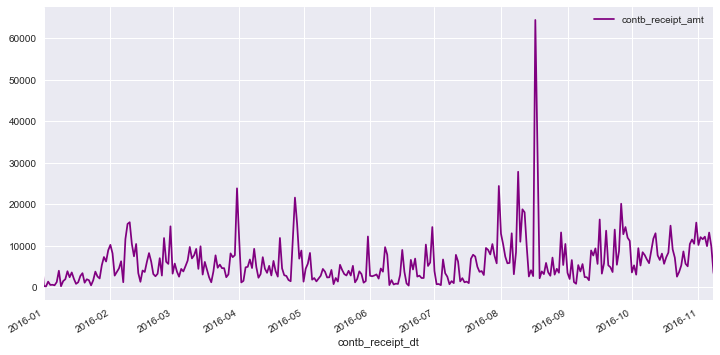

In [7]:
sum_df.plot('contb_receipt_dt','contb_receipt_amt',figsize=(12,6),marker='',linestyle='-',color='purple',
            xlim=('2016-01-01','2016-11-08'))

<hr>
### Line graph of how many people donated per day

In [8]:
count_df = df.groupby(['contb_receipt_dt'],as_index=False).count()

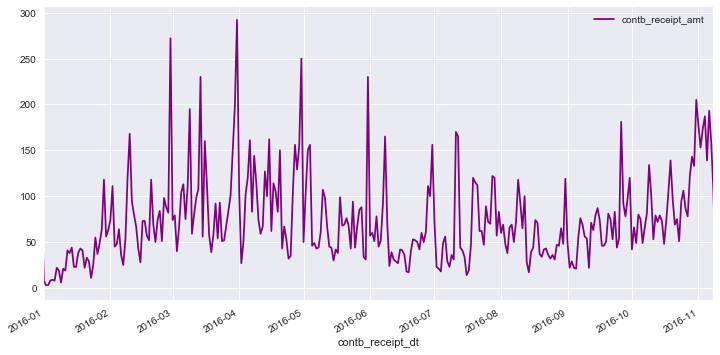

In [9]:
count_df.plot('contb_receipt_dt','contb_receipt_amt',figsize=(12,6),marker='',linestyle='-',color='purple',
              xlim=('2016-01-01','2016-11-08'))

<hr>
### Line graph of average donated per day

In [10]:
mean_df = df.groupby(['contb_receipt_dt'],as_index=False).mean()

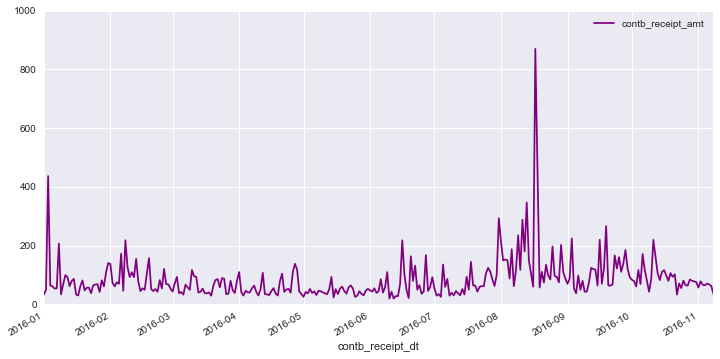

In [11]:
mean_df.plot('contb_receipt_dt','contb_receipt_amt',figsize=(12,6),marker='',linestyle='-',color='purple',
              xlim=('2016-01-01','2016-11-08'),ylim=(0,1000))

<hr>

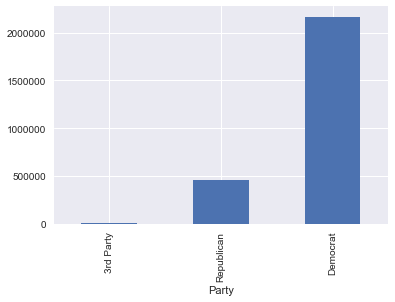

In [12]:
df.groupby('Party')['contb_receipt_amt'].sum().sort_values().plot(kind='bar')

In [13]:
df['contb_receipt_amt'].describe()

count    25888.000000
mean       101.918519
std        310.665254
min          0.050000
25%         15.000000
50%         27.000000
75%         52.302500
max       2700.000000
Name: contb_receipt_amt, dtype: float64

In [14]:
df.groupby('cand_nm')['contb_receipt_amt'].count().sort_values(ascending=False)

cand_nm
Clinton, Hillary Rodham      12538
Sanders, Bernard             10094
Trump, Donald J.              1653
Cruz, Rafael Edward 'Ted'      798
Carson, Benjamin S.            343
Rubio, Marco                   168
Stein, Jill                     59
Kasich, John R.                 46
Fiorina, Carly                  40
Bush, Jeb                       32
O'Malley, Martin Joseph         32
Paul, Rand                      30
Johnson, Gary                   18
Walker, Scott                   10
Lessig, Lawrence                 9
Christie, Christopher J.         7
Graham, Lindsey O.               4
Webb, James Henry Jr.            4
Gilmore, James S III             2
Pataki, George E.                1
Name: contb_receipt_amt, dtype: int64

In [15]:
df['contb_receipt_amt'].value_counts()

25.00      3660
50.00      2879
10.00      2614
100.00     2325
27.00      1685
15.00      1624
5.00       1539
250.00      842
20.00       514
35.00       468
19.00       445
3.00        395
8.00        389
1000.00     364
200.00      350
500.00      334
40.00       288
38.00       280
28.00       240
2700.00     237
75.00       235
1.00        222
80.00       202
30.00       190
150.00      155
37.00       150
7.00        114
14.00        89
13.50        88
11.00        80
           ... 
71.51         1
31.92         1
17.58         1
83.00         1
17.56         1
60.10         1
24.36         1
45.20         1
60.96         1
24.30         1
105.70        1
5.40          1
7.60          1
87.45         1
105.77        1
1125.00       1
93.70         1
31.45         1
42.55         1
68.33         1
1028.00       1
43.26         1
617.32        1
126.61        1
175.61        1
114.00        1
27.75         1
50.50         1
425.00        1
31.80         1
Name: contb_receipt_amt,

#### As with the full dataset $25 is the most frequent donation<br><br>Lets look at the canidates

In [16]:
cand_df = df.groupby("cand_nm").sum().sort_values(by="contb_receipt_amt",ascending=False)
cand_df = cand_df.drop(['contbr_zip','file_num'], axis=1)

In [17]:
cand_df

,contb_receipt_amt
cand_nm,
"Clinton, Hillary Rodham",1714093.23
"Sanders, Bernard",404971.83
"Trump, Donald J.",222864.80
"Cruz, Rafael Edward 'Ted'",61399.80
"Bush, Jeb",59160.00
"Kasich, John R.",45200.00
"O'Malley, Martin Joseph",31370.00
"Carson, Benjamin S.",25441.05
"Rubio, Marco",21729.00


#### Obviously Hillary raised the most<br><br>However what really surprises me is how much Jill Stein raised, but maybe it was just a few people donating a lot<br><br>Lets find out!

In [18]:
count_df = df.groupby("cand_nm").count().sort_values(by="contb_receipt_amt",ascending=False)
count_df = count_df.drop(['contbr_zip','file_num'], axis=1)
count_df['cmte_id']

cand_nm
Clinton, Hillary Rodham      12538
Sanders, Bernard             10094
Trump, Donald J.              1653
Cruz, Rafael Edward 'Ted'      798
Carson, Benjamin S.            343
Rubio, Marco                   168
Stein, Jill                     59
Kasich, John R.                 46
Fiorina, Carly                  40
Bush, Jeb                       32
O'Malley, Martin Joseph         32
Paul, Rand                      30
Johnson, Gary                   18
Walker, Scott                   10
Lessig, Lawrence                 9
Christie, Christopher J.         7
Graham, Lindsey O.               4
Webb, James Henry Jr.            4
Gilmore, James S III             2
Pataki, George E.                1
Name: cmte_id, dtype: int64

#### Jill Stein got more donations then Rand Paul and Gary Johnson combined which I found surprising
<hr>

### Total Raised by Canidate

In [19]:
total_donations = df.groupby("cand_nm").sum().sort_values(by="contb_receipt_amt",ascending=True)

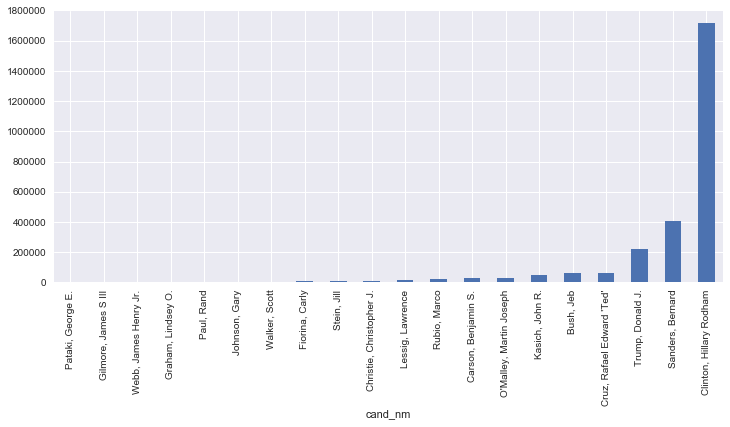

In [20]:
total_donations["contb_receipt_amt"].plot(kind="bar",figsize=(12,5))

<hr>
### Average Ammount Donated to Canidate

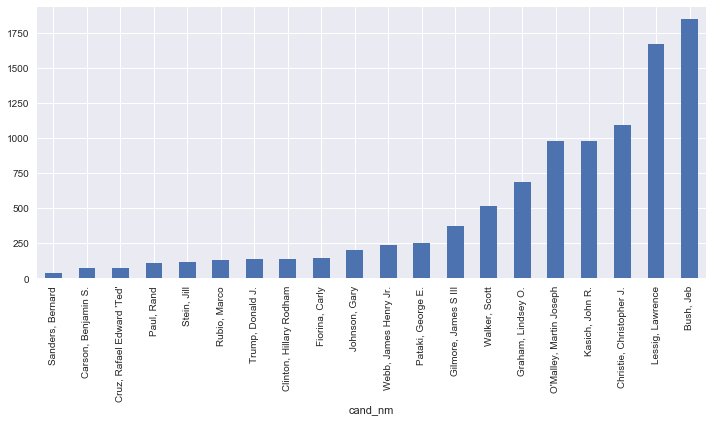

In [21]:
avg_donations = df.groupby("cand_nm").mean().sort_values(by="contb_receipt_amt")
avg_donations["contb_receipt_amt"].plot(kind="bar",figsize=(12,5))

#### I expected the average donation to Sanders to be low, but not dead last, lets look at lower donations between him and Hillary

In [22]:
# Getting a dataframe of just bernie and Hillary
dem_df = df[df['cand_nm'].isin(['Sanders, Bernard', 'Clinton, Hillary Rodham'])]

In [23]:
# only getting values under 100
don_df_15 = dem_df[dem_df.contb_receipt_amt < 15]
don_df_25 = dem_df[dem_df.contb_receipt_amt < 25]
don_df_35 = dem_df[dem_df.contb_receipt_amt < 35]
don_df_50 = dem_df[dem_df.contb_receipt_amt < 50]
don_df_75 = dem_df[dem_df.contb_receipt_amt < 75]
don_df_100 = dem_df[dem_df.contb_receipt_amt < 100]

In [24]:
# Grouping by canidate and totaling the ammount
don_df_15 = don_df_15.groupby("cand_nm").sum().sort_values(by="contb_receipt_amt")
don_df_25 = don_df_25.groupby("cand_nm").sum().sort_values(by="contb_receipt_amt")
don_df_35 = don_df_35.groupby("cand_nm").sum().sort_values(by="contb_receipt_amt")
don_df_50 = don_df_50.groupby("cand_nm").sum().sort_values(by="contb_receipt_amt")
don_df_75 = don_df_75.groupby("cand_nm").sum().sort_values(by="contb_receipt_amt")
don_df_100 = don_df_100.groupby("cand_nm").sum().sort_values(by="contb_receipt_amt")

In [25]:
# Concatinating the datasets together
frames = [don_df_15, don_df_25, don_df_35, don_df_50, don_df_75, don_df_100]

dem_concat = pd.concat(frames, keys=['15', '25', '35', '50', '75', '100'])

#resetting the index and dropping the columns we don't need
dem_concat = dem_concat.reset_index()
dem_concat = dem_concat.drop('contbr_zip', axis=1)
dem_concat = dem_concat.drop('file_num', axis=1)

In [26]:
dem_concat

,level_0,cand_nm,contb_receipt_amt
0,15,"Clinton, Hillary Rodham",21390.09
1,15,"Sanders, Bernard",22308.33
2,25,"Clinton, Hillary Rodham",39354.24
3,25,"Sanders, Bernard",49218.35
4,35,"Clinton, Hillary Rodham",112791.32
5,35,"Sanders, Bernard",116954.85
6,50,"Sanders, Bernard",134043.05
7,50,"Clinton, Hillary Rodham",136638.72
8,75,"Sanders, Bernard",204599.44
9,75,"Clinton, Hillary Rodham",211747.62


In [27]:
# Pivoting by the amt ranges
dem_concat = dem_concat.pivot_table('contb_receipt_amt',index='level_0',columns = 'cand_nm',aggfunc='sum')

In [28]:
new_index= ['15', '25', '35', '50', '75', '100']
dem_concat = dem_concat.reindex(new_index)
dem_concat.head()

cand_nm,"Clinton, Hillary Rodham","Sanders, Bernard"
level_0,,
15,21390.09,22308.33
25,39354.24,49218.35
35,112791.32,116954.85
50,136638.72,134043.05
75,211747.62,204599.44


### Bernie vs. Clinton Small Donations

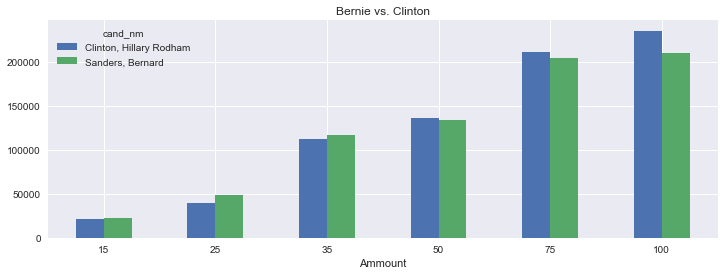

In [29]:
dem_concat[['Clinton, Hillary Rodham','Sanders, Bernard']].plot(kind='bar',figsize=(12,4))
plt.xlabel('Ammount')
locs, labels = plt.xticks()
plt.setp(labels, rotation=360)
plt.title('Bernie vs. Clinton')

#### Bernie out earns Hillary till the $50 Mark and larger values where she pushes ahead, though this data continued <br>on after Bernie dropped out. For a more accurate picture we would only want donations before Bernie dropped out

<hr>
## RI - Cities

In [30]:
df['contbr_city'].value_counts()

PROVIDENCE          5428
CRANSTON            1916
SOUTH KINGSTOWN     1754
WARWICK             1553
NEWPORT             1286
NORTH KINGSTOWN     1170
BARRINGTON          1003
EAST PROVIDENCE      968
PAWTUCKET            854
EAST GREENWICH       816
NARRAGANSETT         745
BRISTOL              737
WESTERLY             555
CUMBERLAND           553
PORTSMOUTH           509
LINCOLN              485
WEST WARWICK         456
JAMESTOWN            435
COVENTRY             419
MIDDLETOWN           399
NORTH PROVIDENCE     375
CHARLESTOWN          309
WARREN               291
NEW SHOREHAM         288
TIVERTON             286
SCITUATE             279
WOONSOCKET           264
LITTLE COMPTON       261
GLOCESTER            218
JOHNSTON             202
SMITHFIELD           196
NORTH SMITHFIELD     167
BURRILLVILLE         156
HOPKINTON            143
RICHMOND             132
FOSTER               125
WEST GREENWICH        73
EXETER                62
CENTRAL FALLS         20
Name: contbr_city, dtype:

In [31]:
city_df = df.pivot_table('contb_receipt_amt',index='contbr_city',columns = 'Party',aggfunc='sum')
city_df["Total"] = city_df.sum(axis=1)
city_df = city_df.sort_values(by="Total",ascending=True)

city_df.head()

Party,3rd Party,Democrat,Republican,Total
contbr_city,,,,
CENTRAL FALLS,NaN,900.00,NaN,900.00
NORTH SMITHFIELD,NaN,6817.93,1531.93,8349.86
WEST GREENWICH,NaN,672.00,8133.66,8805.66
RICHMOND,NaN,4588.55,4408.40,8996.95
BURRILLVILLE,NaN,7464.01,1796.69,9260.70


### Total Ammount Donated by City

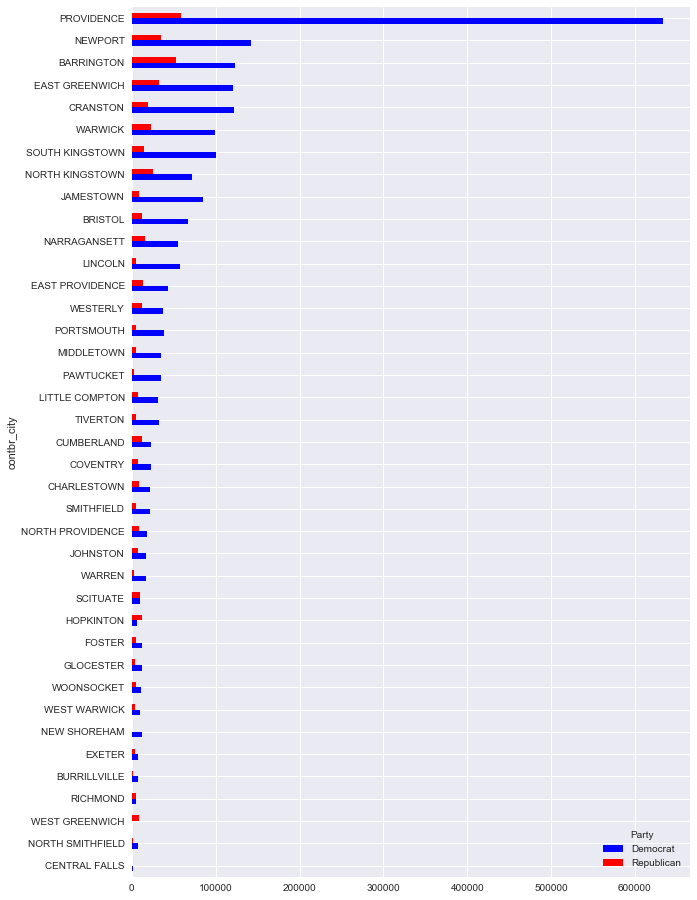

In [32]:
city_df[['Democrat','Republican']].plot(kind='barh',figsize=(10,16),cmap='bwr')

### Average Donation by City

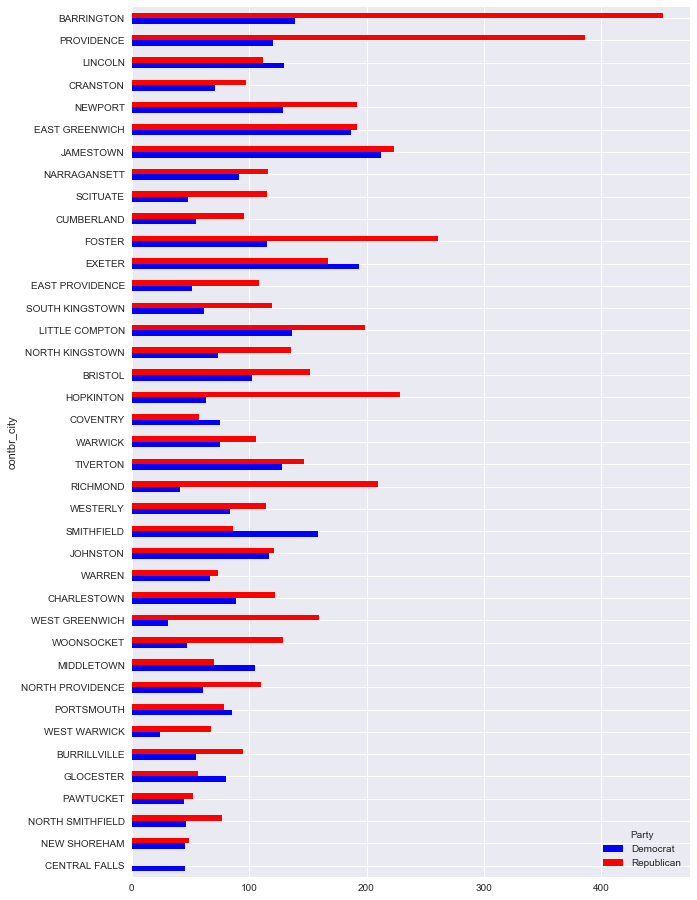

In [33]:
city_mean = df.pivot_table('contb_receipt_amt',index='contbr_city',columns = 'Party',aggfunc='mean')
city_mean["Total"] = city_mean.sum(axis=1)
city_mean = city_mean.sort_values(by="Total",ascending=True)

city_mean[['Democrat','Republican']].plot(kind='barh',figsize=(10,16),cmap='bwr')

### Count of Donations by City

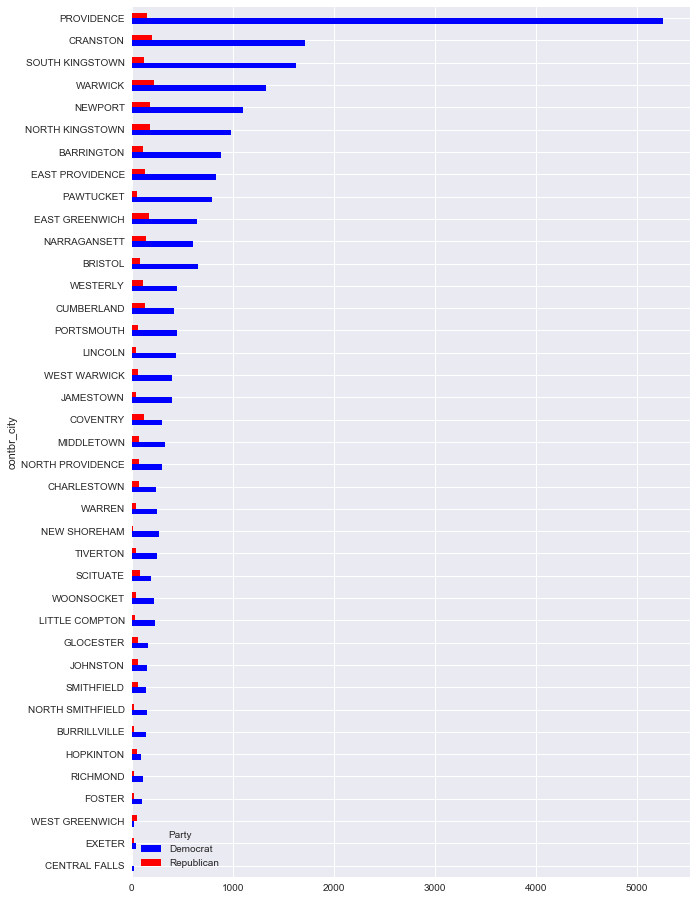

In [34]:
city_count = df.pivot_table('contb_receipt_amt',index='contbr_city',columns = 'Party',aggfunc='count')
city_count["Total"] = city_count.sum(axis=1)
city_count = city_count.sort_values(by="Total",ascending=True)

city_count[['Democrat','Republican']].plot(kind='barh',figsize=(10,16),cmap='bwr')

<hr>
## Jobs

In [35]:
occupation_df = df.pivot_table('contb_receipt_amt',index='contbr_occupation',columns = 'Party',aggfunc='sum')
occupation_df["Total"] = occupation_df.sum(axis=1)
occupation_df = occupation_df.sort_values(by="Total",ascending=True)
occupation_df.shape

(1334, 4)

#### Well we can't graph 1,000+ Jobs so lets cut it down

In [36]:
occupation_df = occupation_df[occupation_df['Total'] > 10000]
# remove these rows
occupation_df.drop(['INFORMATION REQUESTED', 'RETIRED'],axis=0,inplace=True)

occupation_df.shape

(31, 4)

### Total Ammount Donated by Career

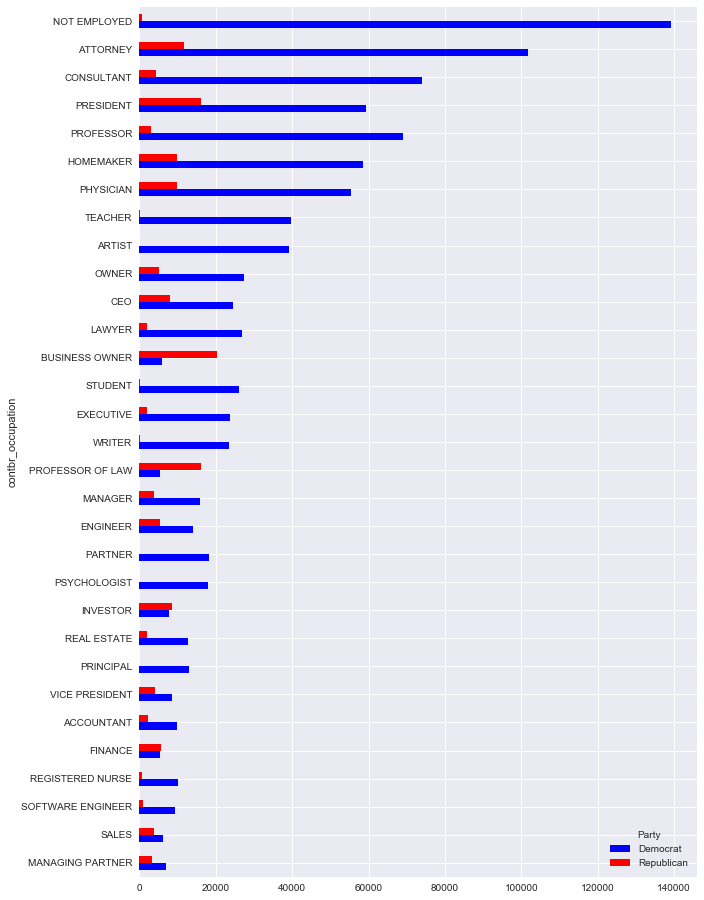

In [37]:
occupation_df[['Democrat','Republican']].plot(kind='barh',figsize=(10,16),cmap='bwr')

In [38]:
occupation_count = df.pivot_table('contb_receipt_amt',index='contbr_occupation',columns = 'Party',aggfunc='count')
occupation_count["Total"] = occupation_count.sum(axis=1)
occupation_count = occupation_count.sort_values(by="Total",ascending=True)

occupation_count.shape

(1334, 4)

In [39]:
occupation_count = occupation_count[occupation_count['Total'] > 100]
occupation_count.drop(['INFORMATION REQUESTED', 'RETIRED','DISABLED'],axis=0,inplace=True)

occupation_count.loc['REGISTERED NURSE'] = occupation_count.loc['REGISTERED NURSE'] + occupation_count.loc['RN']
occupation_count.drop('RN', inplace=True)
occupation_count.shape

(24, 4)

### How Many Donated From Each Occupation

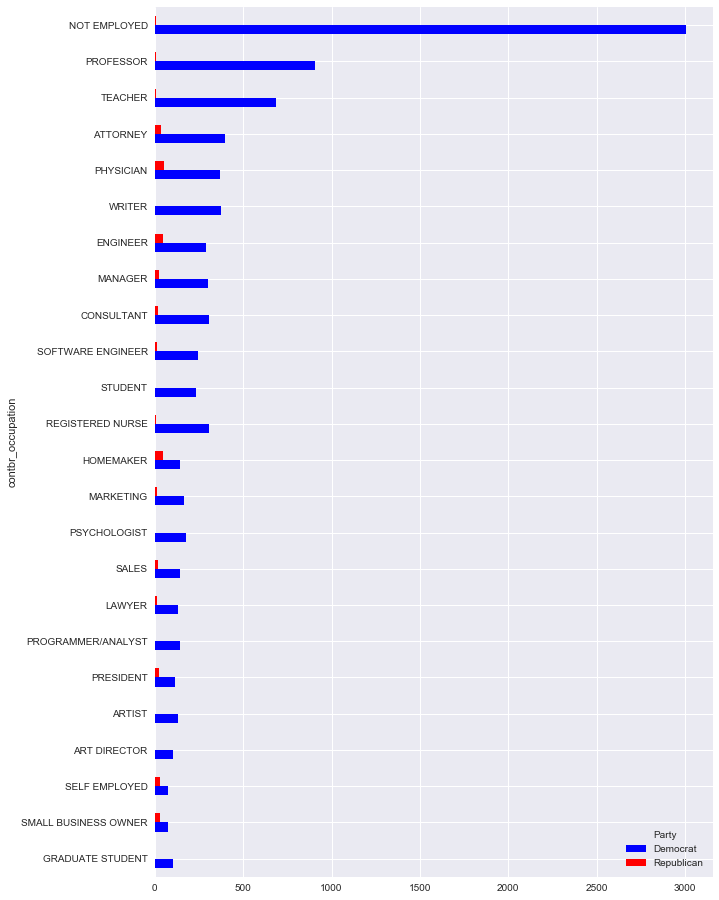

In [40]:
occupation_count[['Democrat','Republican']].plot(kind='barh',figsize=(10,16),cmap='bwr')

<hr>
## Looking at Donations by Company

In [41]:
employer_df = df.pivot_table('contb_receipt_amt',index='contbr_employer',columns = 'Party',aggfunc='sum')
employer_df["Total"] = employer_df.sum(axis=1)
employer_df = employer_df[employer_df['Total'] > 5000]

employer_df.shape

(53, 4)

In [42]:
employer_df.drop(['INFORMATION REQUESTED PER BEST EFFORTS', 'INFORMATION REQUESTED', 'RETIRED'],axis=0,inplace=True)
# combine like rows
employer_df.loc['SELF-EMPLOYED'] = employer_df.loc['SELF-EMPLOYED'] + employer_df.loc['SELF EMPLOYED'] + employer_df.loc['SELF']
employer_df.loc['NOT EMPLOYED'] = employer_df.loc['NOT EMPLOYED'] + employer_df.loc['NONE']
# remove self employed without dash
employer_df.drop('SELF EMPLOYED',inplace=True)
employer_df.drop('SELF',inplace=True)
employer_df.drop('NONE',inplace=True)

# These were far to large to allow us to see anything else
employer_df.drop('HOMEMAKER',inplace=True)
employer_df.drop('NOT EMPLOYED',inplace=True)
employer_df.drop('SELF-EMPLOYED',inplace=True)

employer_df = employer_df.sort_values(by="Total",ascending=True)

### Total donations by Company

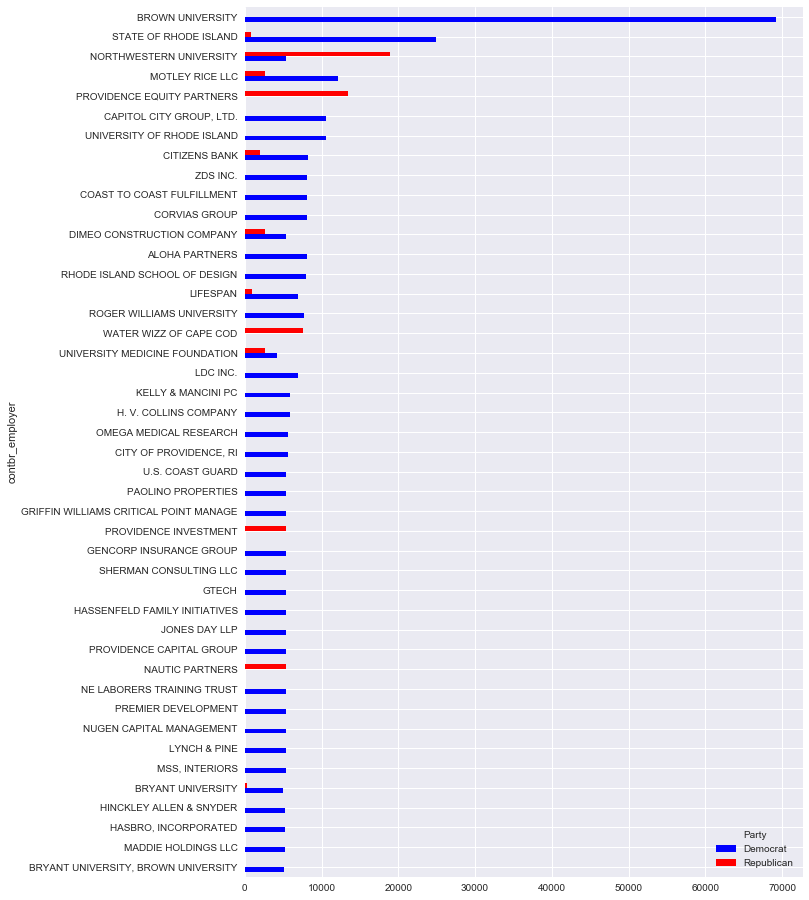

In [43]:
employer_df[['Democrat','Republican']].plot(kind='barh',figsize=(10,16),cmap='bwr')

In [44]:
employer_cnt = df.pivot_table('contb_receipt_amt',index='contbr_employer',columns = 'Party',aggfunc='count')
employer_cnt["Total"] = employer_cnt.sum(axis=1)
employer_cnt = employer_cnt[employer_cnt['Total'] > 50]

employer_cnt.shape

(41, 4)

In [45]:
employer_cnt.drop(['INFORMATION REQUESTED PER BEST EFFORTS', 'INFORMATION REQUESTED', 'RETIRED'],axis=0,inplace=True)
# combine like rows
employer_cnt.loc['SELF-EMPLOYED'] = employer_cnt.loc['SELF-EMPLOYED'] + employer_cnt.loc['SELF EMPLOYED'] + employer_cnt.loc['SELF'] + employer_cnt.loc['SELF EMPLOYED-EMPLOYED']
employer_cnt.loc['NOT EMPLOYED'] = employer_cnt.loc['NOT EMPLOYED'] + employer_cnt.loc['NONE'] + employer_cnt.loc['UNEMPLOYED']
employer_cnt.loc['UNIVERSITY OF RHODE ISLAND'] = employer_cnt.loc['UNIVERSITY OF RHODE ISLAND'] + employer_cnt.loc['UNIVERSITY OF RHODE ISLAND']
# remove self employed without dash
employer_cnt.drop('SELF EMPLOYED',inplace=True)
employer_cnt.drop('SELF EMPLOYED-EMPLOYED',inplace=True)
employer_cnt.drop('SELF',inplace=True)
employer_cnt.drop('NONE',inplace=True)
employer_cnt.drop('UNEMPLOYED',inplace=True)
employer_cnt.drop('UNIVERSITY OF RI',inplace=True)

# These were far to large to allow us to see anything else
employer_cnt.drop('NOT EMPLOYED',inplace=True)
employer_cnt.drop('SELF-EMPLOYED',inplace=True)

employer_cnt = employer_cnt.sort_values(by="Total",ascending=True)

### Count of how many donations per Company

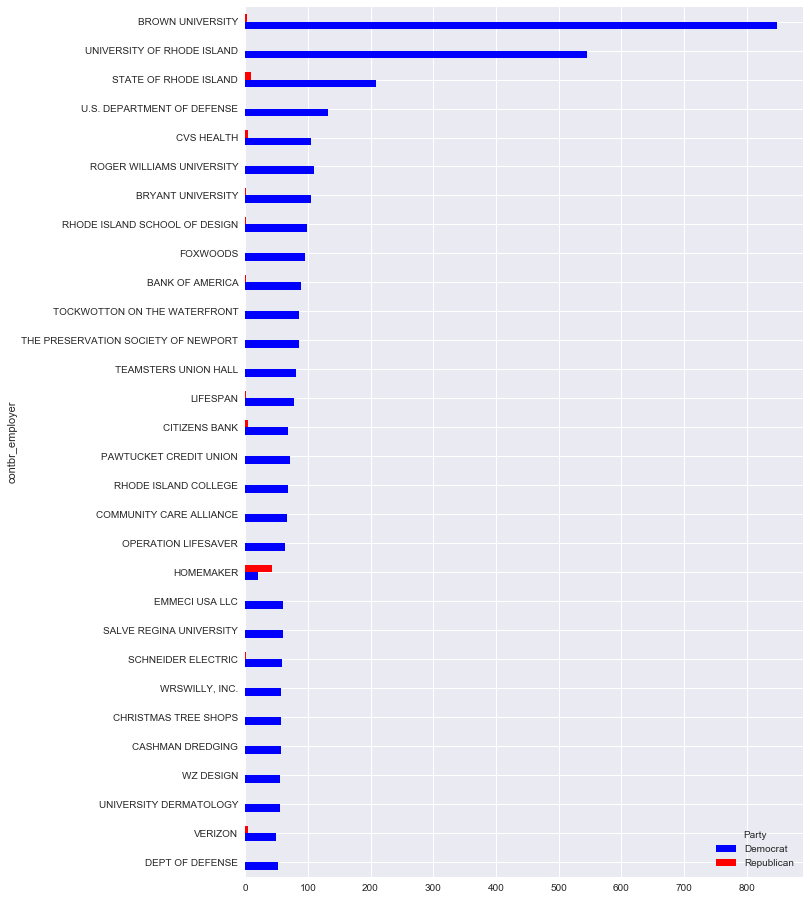

In [46]:
employer_cnt[['Democrat','Republican']].plot(kind='barh',figsize=(10,16),cmap='bwr')

<hr>
## Counties

In [47]:
df['County'].value_counts()

PROVIDENCE    12206
WASHINGTON     5158
KENT           3317
NEWPORT        3176
BRISTOL        2031
Name: County, dtype: int64

### Total Ammount Donated by County

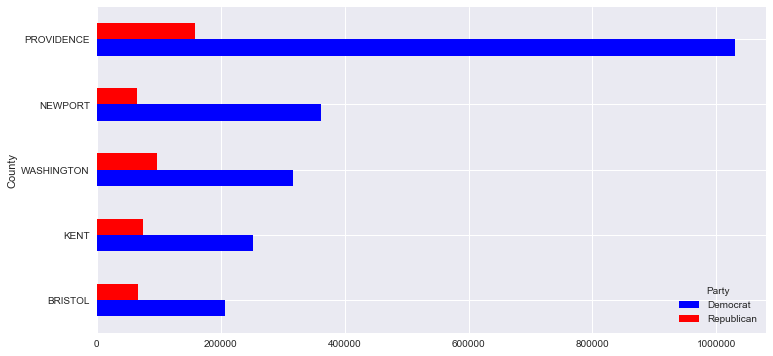

In [48]:
county_df = df.pivot_table('contb_receipt_amt',index='County',columns = 'Party',aggfunc='sum')
county_df["Total"] = county_df.sum(axis=1)
county_df = county_df.sort_values(by="Total",ascending=True)

county_df[['Democrat','Republican']].plot(kind='barh',figsize=(12,6),cmap='bwr')

### Average Donation by County

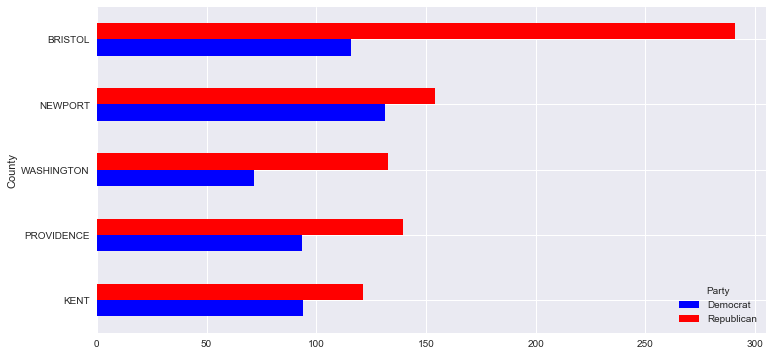

In [49]:
county_df = df.pivot_table('contb_receipt_amt',index='County',columns = 'Party',aggfunc='mean')
county_df["Total"] = county_df.mean(axis=1)
county_df = county_df.sort_values(by="Total",ascending=True)

county_df[['Democrat','Republican']].plot(kind='barh',figsize=(12,6),cmap='bwr')

### Count of Donations by County

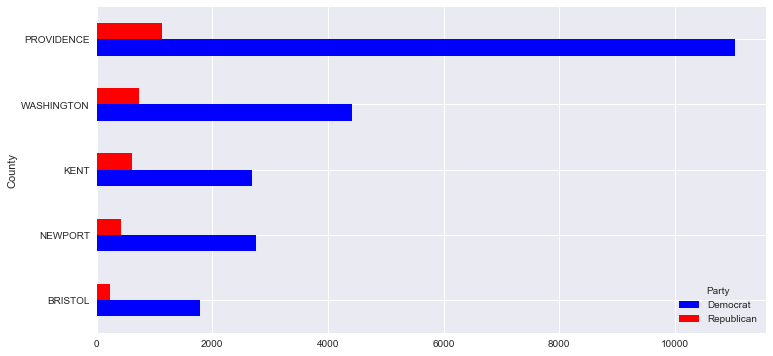

In [50]:
county_df = df.pivot_table('contb_receipt_amt',index='County',columns = 'Party',aggfunc='count')
county_df["Total"] = county_df.sum(axis=1)
county_df = county_df.sort_values(by="Total",ascending=True)

county_df[['Democrat','Republican']].plot(kind='barh',figsize=(12,6),cmap='bwr')